## Experiments on random sampling with replacement

I am interested in studying the properties of random sampling with and without replacement, to get a better idea of when to apply each.

To do this I will define two different probability distributions, $A$ and $B$, with
\begin{align}
p_A\left(x\right) ~&=~ \frac{2}{7}\left(1 + 10 x^3\right) \\
\mathbb{E}_{p_A}\left[x\right] ~&=~ \frac{5}{7} \\
p_B\left(x\right) ~&=~ \mathrm{Gauss}\left(x;0.5, 0.1\right) \\
\mathbb{E}_{p_B}\left[x\right] ~&=~ 0.5 \\
\end{align}

These are chosen such that distribution $A$ is very asymmetric, and $B$ is very symmetric, so we can see if this makes any difference.

I will construct a dataset of size $1000$ from each distribution. I will then form estimators for the mean of this dataset using random sampling with and without sampling. I will study the bias and variance on these estimators (which are normally distributed due to the CLT), and interpret the results.

In [1]:
# Required imports

import numpy      as     np
from   scipy      import stats
from   matplotlib import pyplot as plt

In [2]:
# Define PDF and associated methods for distribution A

true_mean_A = 5./7.

def pdf_A(x) :
    return 2. * (1+10*x*x*x) / 7.

def cdf_A(x) :
    return (2*x + 5*x*x*x*x) / 7.

def sample_A(n_samples=1, n_evals=1001) :
    u_cdf  = np.random.uniform(size=(n_samples,), low=0, high=1)
    x_func = np.linspace(0, 1, n_evals)
    x_cdf  = cdf_A(x_func)
    return np.interp(u_cdf, x_cdf, x_func)

In [3]:
# Define PDF and associated methods for distribution B

true_mean_B = .5

def pdf_B(x) :
    return stats.norm.pdf(x, loc=true_mean_B, scale=.1)

def cdf_B(x) :
    return stats.norm.cdf(x, loc=true_mean_B, scale=.1)

def sample_B(n_samples=1) :
    return true_mean_B + .1*np.random.normal(size=(n_samples,))

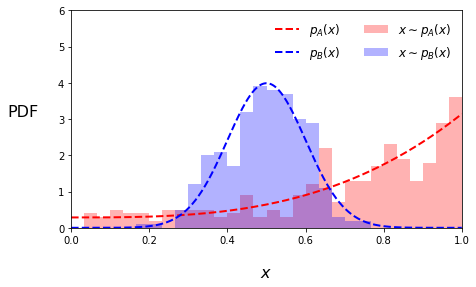

In [4]:
# For each of A and B, sample a dataset of size 1000
# These will form the fixed ensemble from which we will drawn subsamples
# They could be thought of as observed datasets, or as 1000 categories over which we wish to
#   estimate some expectation values

n_dataset = int(300)

dataset_A = sample_A(n_dataset)
dataset_B = sample_B(n_dataset)

fig = plt.figure(figsize=(7,4))
ax  = fig.add_subplot(1, 1, 1)
ax.hist(dataset_A, bins=np.linspace(0, 1, 31), density=True, color="r", alpha=0.3, label=r"$x \sim p_A(x)$")
ax.hist(dataset_B, bins=np.linspace(0, 1, 31), density=True, color="b", alpha=0.3, label=r"$x \sim p_B(x)$")
x = np.linspace(0, 1, 501)
ax.plot(x, pdf_A(x), color="r", lw=2, ls="--", label=r"$p_A(x)$")
ax.plot(x, pdf_B(x), color="b", lw=2, ls="--", label=r"$p_B(x)$")
ax.set_xlabel("$x$", fontsize=16, labelpad=20)
ax.set_ylabel("PDF", fontsize=16, labelpad=35, rotation=0)
ax.legend(loc="upper right", frameon=False, ncol=2, fontsize=12)
ax.set_xlim([0, 1])
ax.set_ylim([0, 6])
plt.show()


In [5]:
# Get the means of our datasets, which will help study the bias on estimators built from subsamples

mean_dataset_A, std_dataset_A = np.mean(dataset_A), np.std(dataset_A)
mean_dataset_B, std_dataset_B = np.mean(dataset_B), np.std(dataset_B)

print(f"Dataset A mean = {mean_dataset_A:.3f} +- {std_dataset_A/np.sqrt(len(dataset_A)):.3f}  [true is {true_mean_A:.3f}]")
print(f"Dataset B mean = {mean_dataset_B:.3f} +- {std_dataset_B/np.sqrt(len(dataset_B)):.3f}  [true is {true_mean_B:.3f}]")


Dataset A mean = 0.704 +- 0.015  [true is 0.714]
Dataset B mean = 0.496 +- 0.006  [true is 0.500]


In [6]:
# For each A and B, for each case with and without replacement, Run 1000 toys for various subsample sizes N
# For each toy, build an estimator
# COmpute the meand and stds for each case

num_toys = int(1e4)

estimator_sample_sizes = [10, 50, 100, 150, 200, 250, 299]
estimator_distributions_A_rep, estimator_distributions_A_norep = [], []
estimator_distributions_B_rep, estimator_distributions_B_norep = [], []
for N in estimator_sample_sizes :
    print(f"Evaluating {num_toys} estimators using {N} samples each")
    mean_sample_A_rep, mean_sample_A_norep, mean_sample_B_rep, mean_sample_B_norep = [], [], [], []
    for toy_idx in range(num_toys) :
        mean_sample_A_rep  .append(np.mean(np.random.choice(dataset_A, size=(N,), replace=True )))
        mean_sample_A_norep.append(np.mean(np.random.choice(dataset_A, size=(N,), replace=False)))
        mean_sample_B_rep  .append(np.mean(np.random.choice(dataset_B, size=(N,), replace=True )))
        mean_sample_B_norep.append(np.mean(np.random.choice(dataset_B, size=(N,), replace=False)))
    estimator_distributions_A_rep  .append((np.mean(mean_sample_A_rep  ), np.std(mean_sample_A_rep  )))
    estimator_distributions_A_norep.append((np.mean(mean_sample_A_norep), np.std(mean_sample_A_norep)))
    estimator_distributions_B_rep  .append((np.mean(mean_sample_B_rep  ), np.std(mean_sample_B_rep  )))
    estimator_distributions_B_norep.append((np.mean(mean_sample_B_norep), np.std(mean_sample_B_norep)))
    
estimator_distributions_A_rep, estimator_distributions_A_norep = np.array(estimator_distributions_A_rep), np.array(estimator_distributions_A_norep)
estimator_distributions_B_rep, estimator_distributions_B_norep = np.array(estimator_distributions_B_rep), np.array(estimator_distributions_B_norep)


Evaluating 10000 estimators using 10 samples each
Evaluating 10000 estimators using 50 samples each
Evaluating 10000 estimators using 100 samples each
Evaluating 10000 estimators using 150 samples each
Evaluating 10000 estimators using 200 samples each
Evaluating 10000 estimators using 250 samples each
Evaluating 10000 estimators using 299 samples each


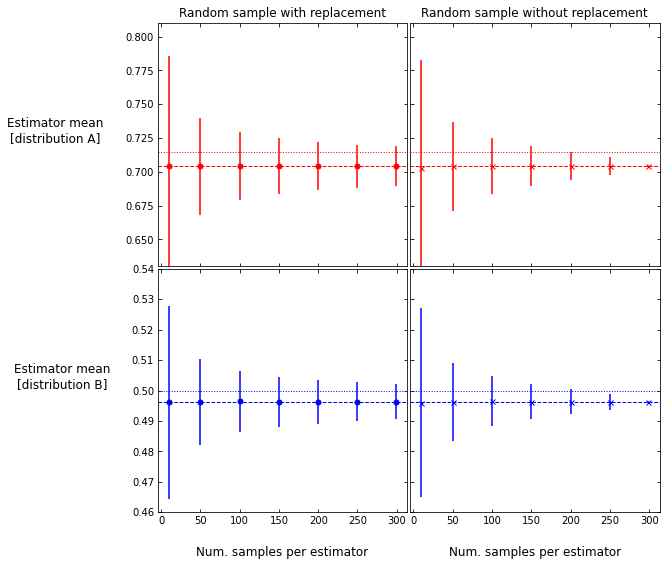

In [7]:
# Plot the difference between the estimated mean and the "true" one evaluated from the full datasets
# Plot the std of the estimators so we can see how the expected variance evolves

fig = plt.figure(figsize=(9, 9))

ax  = fig.add_subplot(2, 2, 1)
ax.axhline(mean_dataset_A, ls="--", c="r", lw=1)
ax.axhline(true_mean_A   , ls=":" , c="r", lw=1)
ax.errorbar(estimator_sample_sizes, estimator_distributions_A_rep[:,0], yerr=estimator_distributions_A_rep[:,1], fmt='o', c="r", marker="o", ms=5)
ax.set_title("Random sample with replacement", fontsize=12)
ax.set_ylabel("Estimator mean\n[distribution A]", rotation=0, fontsize=12, labelpad=70)
ax.set_ylim([0.63, 0.81])
ax.tick_params(axis="both", direction="in", top=True, right=True)
ax.xaxis.set_ticklabels([])

ax  = fig.add_subplot(2, 2, 2)
ax.axhline(mean_dataset_A, ls="--", c="r", lw=1)
ax.axhline(true_mean_A   , ls=":" , c="r", lw=1)
ax.errorbar(estimator_sample_sizes, estimator_distributions_A_norep[:,0], yerr=estimator_distributions_A_norep[:,1], fmt='o', c="r", marker="x", ms=5)
ax.set_title("Random sample without replacement", fontsize=12)
ax.set_ylim([0.63, 0.81])
ax.tick_params(axis="both", direction="in", top=True, right=True)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

ax  = fig.add_subplot(2, 2, 3)
ax.axhline(mean_dataset_B, ls="--", c="b", lw=1)
ax.axhline(true_mean_B   , ls=":" , c="b", lw=1)
ax.errorbar(estimator_sample_sizes, estimator_distributions_B_rep[:,0], yerr=estimator_distributions_B_rep[:,1], fmt='o', c="b", marker="o", ms=5)
ax.set_ylabel("Estimator mean\n[distribution B]", rotation=0, fontsize=12, labelpad=70)
ax.set_xlabel("Num. samples per estimator", rotation=0, fontsize=12, labelpad=20)
ax.set_ylim([0.46, 0.54])
ax.tick_params(axis="both", direction="in", top=True, right=True)

ax  = fig.add_subplot(2, 2, 4)
ax.axhline(mean_dataset_B, ls="--", c="b", lw=1)
ax.axhline(true_mean_B   , ls=":" , c="b", lw=1)
ax.errorbar(estimator_sample_sizes, estimator_distributions_B_norep[:,0], yerr=estimator_distributions_B_norep[:,1], fmt='o', c="b", marker="x", ms=5)
ax.set_xlabel("Num. samples per estimator", rotation=0, fontsize=12, labelpad=20)
ax.set_ylim([0.46, 0.54])
ax.tick_params(axis="both", direction="in", top=True, right=True)
ax.yaxis.set_ticklabels([])

plt.subplots_adjust(hspace=0.01, wspace=0.01)

plt.show()

Therefore both random sampling with and without replacement can be used to form an unbiased estimator for the dataset mean, but using fewer samples than are present in the whole dataset. As expected, sampling without replacement leads to convergence when the number of samples is similar to the total dataset size, whereas sampling with replacement retains a natural variance even when estimators are formed using $\rightarrow \infty$ samples.

This is because sampling with replacement allows us to estimate the variance from the _true_ mean of $p_{A/B}$. It therefore has a minimum std, representing variance due to the finite size of the initial dataset, which cannot be overcome. By contrast, sampling without replacement converges to a single value with no variance because it forms an estimator for the _dataset_ mean, which is eventually computed exactly. We can therefore make the following statements:

- Random sampling without replacement can be used to form an unbiased estimator for the mean of population from which the samples were drawn
- Random sampling with replacement can be used to bootstrap an observed dataset and estimate the distance from the _true mean_ (when this cannot be calculated in a fully unbiased way) (N.B. bootstrapping is unbiased when the dataset size is large)